## 온라인 학습활동 과제 21. Neural Network 연습

### 20175327 이연희

1) Multiple-Layer Perceptron 예 (강의자료 12,13,14 쪽)

**Multiple-Layer Perceptron**

In [5]:
from sklearn.neural_network import MLPClassifier

X=[[0., 0.], [1., 1.]]
y=[0, 1]

clf=MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X, y)

y_pred=clf.predict([[2., 2.], [-1., -2.]])
print(y_pred)
print([coef.shape for coef in clf.coefs_])

y_prob=clf.predict_proba([[2., 2.], [1., 2.]])
print(y_pred)

[1 0]
[(2, 5), (5, 2), (2, 1)]
[1 0]


C:\pyana\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Multiple-Layer Perceptron 정규화**

Automatically created module for IPython interactive environment


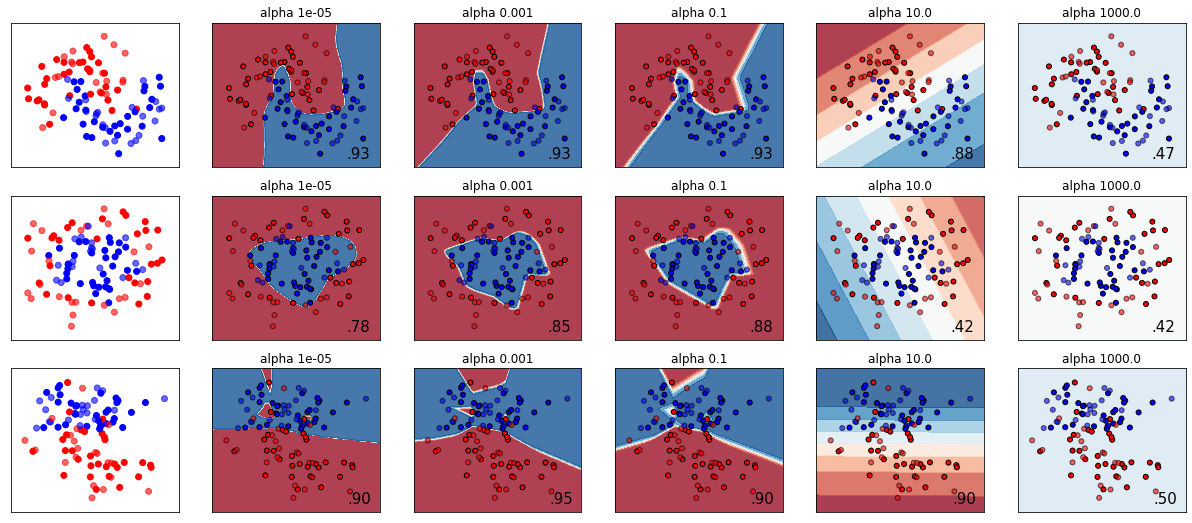

In [8]:
print(__doc__)
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h=.02  # step size in the mesh

alphas=np.logspace(-5, 3, 5)
names=['alpha '+str(i) for i in alphas]

classifiers=[]
for i in alphas:
    classifiers.append(make_pipeline(
                       StandardScaler(),
                       MLPClassifier(solver='lbfgs', alpha=i,
                                     random_state=1, max_iter=2000,
                                     early_stopping=True,
                                     hidden_layer_sizes=[100, 100])
                       ))

X,y=make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng=np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)
linearly_separable=(X, y)

datasets=[make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure=plt.figure(figsize=(17, 9))
i=1

for X, y in datasets:
    X=StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.4)

    x_min, x_max=X[:, 0].min() - .5, X[:, 0].max()+.5
    y_min, y_max=X[:, 1].min() - .5, X[:, 1].max()+.5
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    cm=plt.cm.RdBu
    cm_bright=ListedColormap(['#FF0000','#0000FF'])
    ax=plt.subplot(len(datasets), len(classifiers)+1, i)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1

    for name, clf in zip(names, classifiers):
        ax= plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score= clf.score(X_test, y_test)
        
        if hasattr(clf, "decision_function"):
            Z=clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z=clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z=Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i+=1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

**Iris 데이터 MLP 분류**

In [9]:
from sklearn.datasets import load_iris
iris=load_iris()

print("iris 데이터의 형태:", iris.data.shape)
print("iris 특징 이름:\n", iris.feature_names)
print("iris 데이터 설명:\n", iris.DESCR)

X=iris.data
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

MLP=MLPClassifier(solver='lbfgs' , alpha=0.05,random_state=1, early_stopping=True, hidden_layer_sizes=[20, 2])

MLPfit=MLP.fit(X_train, y_train)
y_pred=MLPfit.predict(X_test)

print("테스트 세트에 대한 예측값:\n {}".format(y_pred))
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred==y_test)))
print("테스트 세트세트의 정확도: {:.2f} ".format(MLPfit.score(X_test, y_test)))

iris 데이터의 형태: (150, 4)
iris 특징 이름:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris 데이터 설명:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76   